# Our Country: Colombia

In [2]:
### Uncomment this to download
# !pip install wbdata
# !pip install cufflinks
# !pip install nbconvert
# !pip install nbconvert[webpdf]
import numpy as np
import pandas as pd
import wbdata
import re
import plotly.offline as plto
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import cufflinks as cf

# Population Statistics

In [4]:
def is_estimation(lower_bound, upper_bound, lower_bounds):
    verdict1 = sum([l == lower_bound for l in lower_bounds])
    verdict2 = sum([l - 1 == upper_bound for l in lower_bounds])
    estimation = verdict1 == 0 or verdict2 == 0
    return estimation 

def get_age_ranges():
    ar = [] ### Age Ranges List

    # Ranges top out at 80, and go in five year increments
    for i in range(0,80,5):
        ar += [(f"{i:02d}"+f"{i+4:02d}")]

    ar += ["80UP"]
    return ar

def find_country(country):
    print(wbdata.search_countries(country))

def population(year, sex, age_range, place):
    sex = sex.lower()

    lower_bound = age_range[0]
    upper_bound = age_range[1]
    ar = get_age_ranges()
    ar_lower_bounds = [int(r[0:2]) for r in ar]
    ar_lower_bounds

    desired_range_lb_index = 0
    desired_range_ub_index = 0

    for lb in ar_lower_bounds:
        if lb < lower_bound:
            desired_range_lb_index += 1
        if lb < upper_bound:
            desired_range_ub_index += 1

    desired_indexes = ar[desired_range_lb_index: desired_range_ub_index]

    if sex == 'female':
        desired_categories = {"SP.POP."+r+".FE":"Females "+r for r in desired_indexes} ### Female Categories
    else:
        desired_categories = {"SP.POP."+r+".MA":"Males "+r for r in desired_indexes} ### Male Categories
    
    try:
        df = wbdata.get_dataframe(desired_categories, country=place)
        df.index = df.index.astype(int)

        estimation = is_estimation(lower_bound, upper_bound, ar_lower_bounds)

        if estimation:
            print(f'Exact Range Not Given. Answer is an Estimation. Included ranges for estimation are {(df.columns).to_numpy()}')

        df = df.apply(np.sum, axis=1)
        
        try: 
            answer = df.loc[year]
            return answer
        except: # Catches error resulting from invalid year entry
            print(f'{year} is an Invalid Year. Ensure that year is between {min(df.index)} and {max(df.index)}')
            return 'Invalid Year'
    except:  # Catches error resulting from invalid place entry
        print(f'{place} is an Invalid Country. Use find_country() to find valid countries')
        return 'Invalid Country'

In [5]:
year = 2020
place = 'COL'
age_range = (0, 100)

sex = 'male'
m_pop = population(year, sex, age_range, place)

sex = 'female'
f_pop = population(year, sex, age_range, place)

tot_pop = m_pop + f_pop
tot_pop

Exact Range Not Given. Answer is an Estimation. Included ranges for estimation are ['Males 0004' 'Males 0509' 'Males 1014' 'Males 1519' 'Males 2024'
 'Males 2529' 'Males 3034' 'Males 3539' 'Males 4044' 'Males 4549'
 'Males 5054' 'Males 5559' 'Males 6064' 'Males 6569' 'Males 7074'
 'Males 7579' 'Males 80UP']
Exact Range Not Given. Answer is an Estimation. Included ranges for estimation are ['Females 0004' 'Females 0509' 'Females 1014' 'Females 1519'
 'Females 2024' 'Females 2529' 'Females 3034' 'Females 3539'
 'Females 4044' 'Females 4549' 'Females 5054' 'Females 5559'
 'Females 6064' 'Females 6569' 'Females 7074' 'Females 7579'
 'Females 80UP']


50930665.0

# Population Dataframes

In [7]:
def get_categories():
    ar = [] ### Age Ranges List

    # Ranges top out at 80, and go in five year increments
    for i in range(0,80,5):
        ar += [(f"{i:02d}"+f"{i+4:02d}")]

    ar += ["80UP"]

    m_cat = {"SP.POP."+r+".MA":"Males "+r for r in ar} ### Male Categories
    f_cat = {"SP.POP."+r+".FE":"Females "+r for r in ar} ### Female Categories

    cats = {**m_cat, **f_cat}
    return cats

def population_dataframe(place):
    cats = get_categories()
    try:
        pop_df = wbdata.get_dataframe(cats,country=place)
        return pop_df
    except:
        print(f'Could Not Return a Dataframe for {place}')
        return 'Invalid Country'

In [8]:
eg = population_dataframe('COL')
eg

,Males 0004,Males 0509,Males 1014,Males 1519,Males 2024,Males 2529,Males 3034,Males 3539,Males 4044,Males 4549,...,Females 3539,Females 4044,Females 4549,Females 5054,Females 5559,Females 6064,Females 6569,Females 7074,Females 7579,Females 80UP
date,,,,,,,,,,,,,,,,,,,,,
2022,1863450.0,1879870.0,1904636.0,2044762.0,2211820.0,2271699.0,2176677.0,1980767.0,1767917.0,1534410.0,...,2004703.0,1824633.0,1618113.0,1531546.0,1464314.0,1243123.0,960937.0,696194.0,472134.0,476565.0
2021,1872904.0,1880579.0,1921834.0,2085844.0,2237669.0,2272080.0,2145863.0,1947363.0,1726679.0,1508500.0,...,1973422.0,1785391.0,1593458.0,1532362.0,1443643.0,1201652.0,922318.0,665106.0,452538.0,461621.0
2020,1873332.0,1880087.0,1942201.0,2113654.0,2239826.0,2247557.0,2098935.0,1903638.0,1678428.0,1485492.0,...,1933443.0,1739827.0,1572269.0,1529761.0,1414124.0,1157392.0,883473.0,634029.0,432973.0,446568.0
2019,1868705.0,1881583.0,1966236.0,2131193.0,2228019.0,2207686.0,2045197.0,1854395.0,1626590.0,1466331.0,...,1889191.0,1691680.0,1555811.0,1522164.0,1375497.0,1109581.0,842826.0,600957.0,411437.0,429646.0
2018,1860651.0,1884949.0,1991227.0,2134154.0,2198986.0,2150158.0,1984049.0,1798082.0,1573850.0,1450608.0,...,1838232.0,1643350.0,1542927.0,1507398.0,1330663.0,1060247.0,799790.0,569642.0,389033.0,411735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1964,1688662.0,1406775.0,1159999.0,919903.0,732719.0,587877.0,498942.0,419034.0,344669.0,286669.0,...,429520.0,353056.0,295477.0,257018.0,200371.0,156923.0,123563.0,88759.0,57667.0,40023.0
1963,1649980.0,1358786.0,1113505.0,884553.0,706668.0,574609.0,488153.0,408355.0,334694.0,282982.0,...,418035.0,342569.0,291728.0,248694.0,193886.0,153687.0,120213.0,86701.0,55023.0,38140.0
1962,1607957.0,1311023.0,1065797.0,853571.0,682476.0,563376.0,477068.0,397490.0,325203.0,280218.0,...,406356.0,332585.0,288949.0,239125.0,188221.0,150961.0,116467.0,84973.0,52200.0,36549.0


# Population Pyramids

In [10]:
def plot_population_pyramid(pop_df, year):
    plto.init_notebook_mode(connected=True)

    layout = go.Layout(barmode='overlay',
                       yaxis=go.layout.YAxis(range=[0, 90], title='Age'),
                       xaxis=go.layout.XAxis(title='Number'),
                       title=dict(text='Initial Plot Title',
                                  x=0.5, 
                                  font=dict(color='black', family='Arial', size=24))
                      )

    ar = get_age_ranges()
    
    try:
        bins = [go.Bar(x = pop_df.loc[str(year),:].filter(regex="Male").values,
                       y = [int(s[:2])+1 for s in ar],
                       orientation='h',
                       name='Men',
                       marker=dict(color='blue'),
                       hoverinfo='skip'
                       ),

                go.Bar(x = -pop_df.loc[str(year),:].filter(regex="Female").values,
                       y=[int(s[:2])+1 for s in ar],
                       orientation='h',
                       name='Women',
                       marker=dict(color='red'),
                       hoverinfo='skip',
                       )
                ]
        fig = go.Figure(data=bins, layout=layout)

        fig.update_xaxes(title_text='Population')

        fig.update_yaxes(title_text='Age Range')

        fig.update_layout(title_text=f'Population Pyramid in {year}')
        fig.show()
    
    except:
        print(f'{year} is an Invalid Year. Ensure that year is between {min(pop_df.index)} and {max(pop_df.index)}')
        return 'Invalid Year'

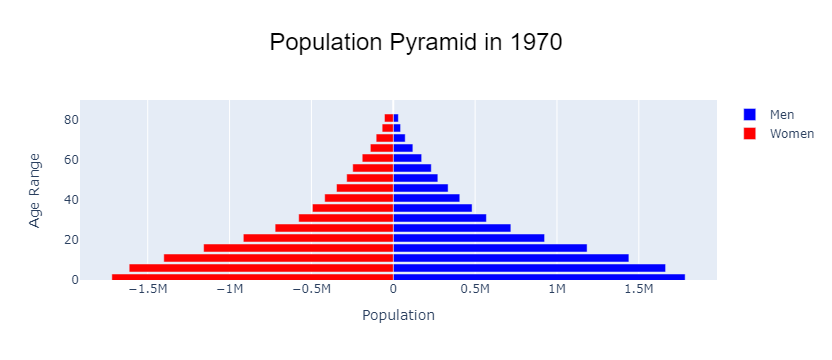

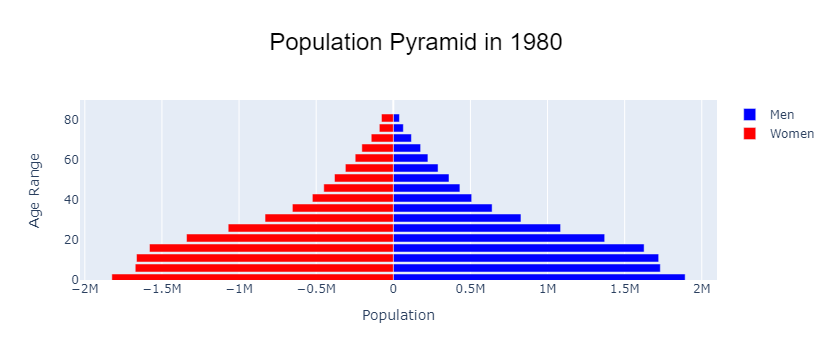

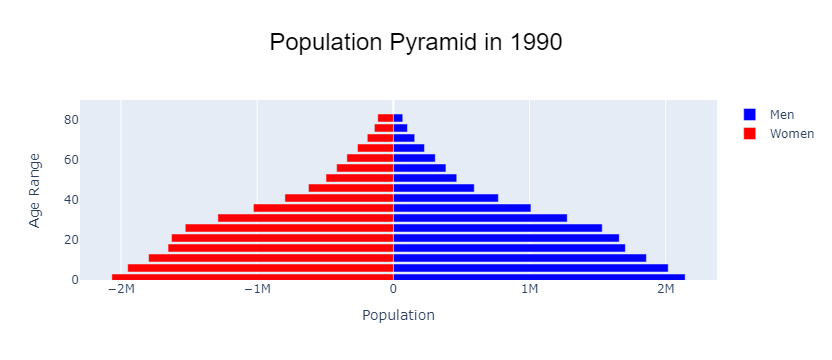

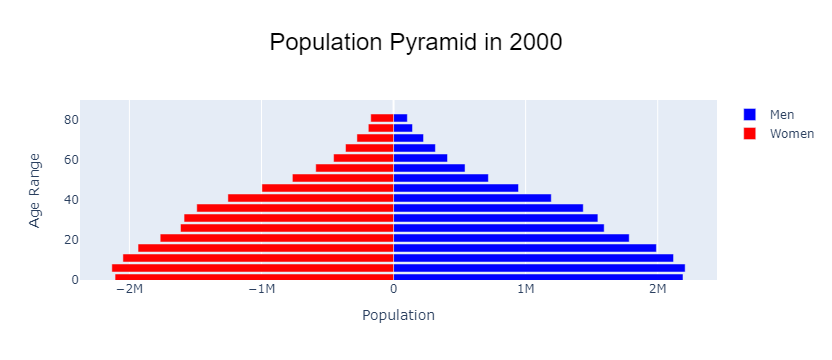

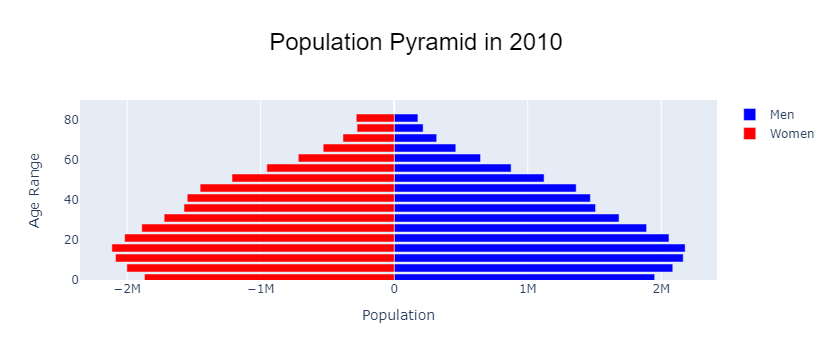

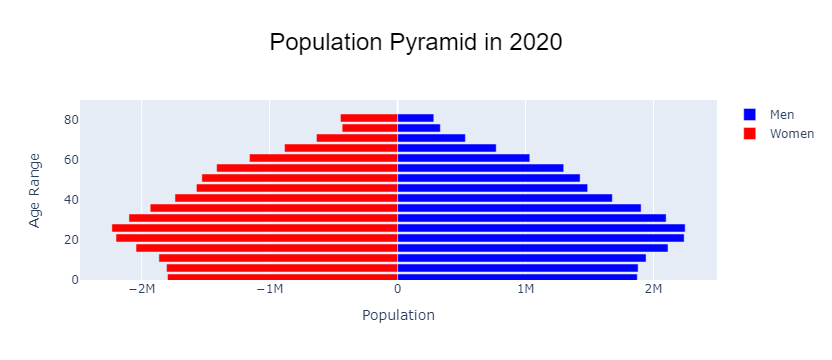

In [11]:
pop_df = population_dataframe('COL')
for year in np.arange(1970, 2030, 10):
    plot_population_pyramid(pop_df, year)

# Unit Tests

In [13]:
def unit_test(case):
    if case:
        print('Test Case Passed')
        return case
    else:
        print('Test Case Failed')
        return case

### population( )Test the Value Returns Correct Answers

In [15]:
n = 1

### Test the Unit Test Works
year = 2020
place = 'COL'
age_range = (0, 59)

sex = 'male'
pop = population(year, sex, age_range, place)
case = pop < 0
print(f'Test {n}:')
unit_test(~(case))
n += 1

### Basic Functionality
year = 2020
place = 'COL'
age_range = (0, 59)

sex = 'male'
m_pop = population(year, sex, age_range, place)

sex = 'female'
f_pop = population(year, sex, age_range, place)

tot_pop = m_pop + f_pop
case = tot_pop > 4e7
print(f'\nTest {n}:')
unit_test(case)
n += 1

### Test the year hyperparameter works
sex = 'male'
place = 'COL'
age_range = (0, 59)

year = 2020
m_pop1 = population(year, sex, age_range, place)

year = 2021
m_pop2 = population(year, sex, age_range, place)

case = m_pop1 != m_pop2
print(f'\nTest {n}:')
unit_test(case)
n += 1

### Test the sex hyperparameter works
year = 2020
place = 'COL'
age_range = (0, 59)

sex = 'male'
m_pop = population(year, sex, age_range, place)

sex = 'female'
f_pop = population(year, sex, age_range, place)

case = m_pop != f_pop
print(f'\nTest {n}:')
unit_test(case)
n += 1

### Test the place hyperparameter works
sex = 'male'
place = 'COL'
year = 2020
age_range = (0, 59)

place = 'COL'
m_pop1 = population(year, sex, age_range, place)

place = 'USA'
m_pop2 = population(year, sex, age_range, place)

case = m_pop1 != m_pop2
print(f'\nTest {n}:')
unit_test(case)
n += 1

### Test the age_range hyperparameter wors
sex = 'male'
place = 'COL'
year = 2020

age_range = (0, 59)
m_pop1 = population(year, sex, age_range, place)

age_range = (0, 49)
m_pop2 = population(year, sex, age_range, place)

case = m_pop1 != m_pop2
print(f'\nTest {n}:')
unit_test(case)
n += 1

Test 1:
Test Case Passed

Test 2:
Test Case Passed

Test 3:
Test Case Passed

Test 4:
Test Case Passed

Test 5:
Test Case Passed

Test 6:
Test Case Passed


### population( ) Test the Error Messages Work

In [17]:
n = 1

### Test the Invalid Country Message Works
sex = 'male'
place = 'SPAM'
year = 2020
age_range = (0, 59)

pop = population(year, sex, age_range, place)
case = pop == 'Invalid Country'
print(f'Test {n}:')
unit_test(~(case))
n += 1

### Test the Invalid Year Message Works
sex = 'male'
place = 'COL'
year = 0
age_range = (0, 59)

pop = population(year, sex, age_range, place)
case = pop == 'Invalid Year'
print(f'\nTest {n}:')
unit_test(case)
n += 1

SPAM is an Invalid Country. Use find_country() to find valid countries
Test 1:
Test Case Passed
0 is an Invalid Year. Ensure that year is between 1960 and 2022

Test 2:
Test Case Passed


## population_dataframe( ) Unit Tests

In [19]:
### Basic Functionality
n = 1
eg = population_dataframe('COL')
case = len(eg) == 63

print(f'\nTest {n}:')
unit_test(case)
n += 1

### Test the Invalid Country error message works
eg = population_dataframe('SPAM')
case = eg == 'Invalid Country'

print(f'\nTest {n}:')
unit_test(case)
n += 1


Test 1:
Test Case Passed
Could Not Return a Dataframe for SPAM

Test 2:
Test Case Passed


## plot_population_pyramid( ) Unit Tests

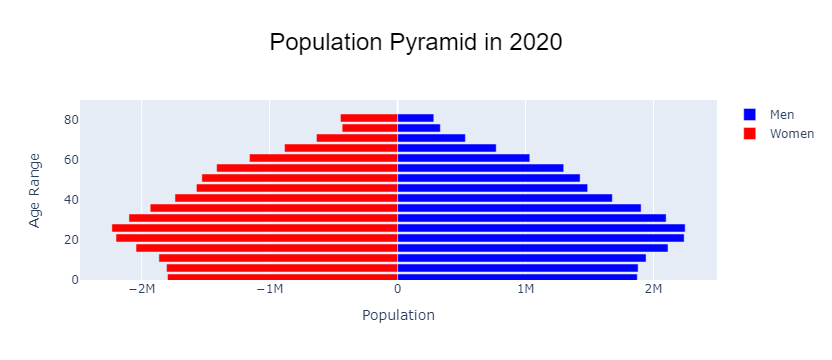


Test 1:
Test Case Passed


0 is an Invalid Year. Ensure that year is between 1960 and 2022

Test 2:
Test Case Passed


In [21]:
### Basic Functionality
n = 1
pop_df = population_dataframe('COL')

eg = plot_population_pyramid(pop_df, 2020)
case = eg == None ### Ploting the graph is NoneType. If the graph plots, then it equals None

print(f'\nTest {n}:')
unit_test(case)
n += 1

### Test the Invalid Country error message works
eg = plot_population_pyramid(pop_df, 0)
case = eg == 'Invalid Year'

print(f'\nTest {n}:')
unit_test(case)
n += 1

# Extras: Animated Population Pyramids

In [23]:
def plot_population_pyramid_animated(pop_df, years):
    plto.init_notebook_mode(connected=True)
    layout = go.Layout(
        barmode='overlay',
        yaxis=go.layout.YAxis(range=[0, 90], title='Age'),
        xaxis=go.layout.XAxis(title='Number'),
        title=dict(text='Initial Plot Title', x=0.5, font=dict(color='black', family='Arial', size=24))
    )

    ar = get_age_ranges()

    frames = [go.Frame(
        data=[
            go.Bar(
                x=pop_df.loc[str(year), :].filter(regex="Male").values,
                y=[int(s[:2]) + 1 for s in ar],
                orientation='h',
                name='Men',
                marker=dict(color='blue'),
                hoverinfo='skip'
            ),
            go.Bar(
                x=-pop_df.loc[str(year), :].filter(regex="Female").values,
                y=[int(s[:2]) + 1 for s in ar],
                orientation='h',
                name='Women',
                marker=dict(color='red'),
                hoverinfo='skip',
            )
        ],
        name=str(year),
    ) for year in years]

    fig = go.Figure(data=frames[0]['data'], layout=layout, frames=frames)

    fig.update_xaxes(title_text='Population')
    fig.update_yaxes(title_text='Age Range')

    fig.update_layout(title_text=f'Population Pyramid Over Time from {years[0]} to {years[-1]}')

    fig.update_layout(updatemenus=[dict(type='buttons', showactive=False, buttons=[dict(label='Play',
                                                method='animate', args=[None, dict(frame=dict(duration=500, redraw=True),
                                                fromcurrent=True)])])])

    fig.update_layout(sliders=[dict(yanchor='top', xanchor='left', currentvalue=dict(font=dict(size=16),
                              prefix='Year:', visible=True, xanchor='right'), transition=dict(duration=300, easing='cubic-in-out'),
                              steps=[dict(args=[[frame.name], dict(frame=dict(duration=300, redraw=True), mode='immediate',
                              transition=dict(duration=300))], label=str(frame.name), method='animate') for frame in frames])])

    fig.show()

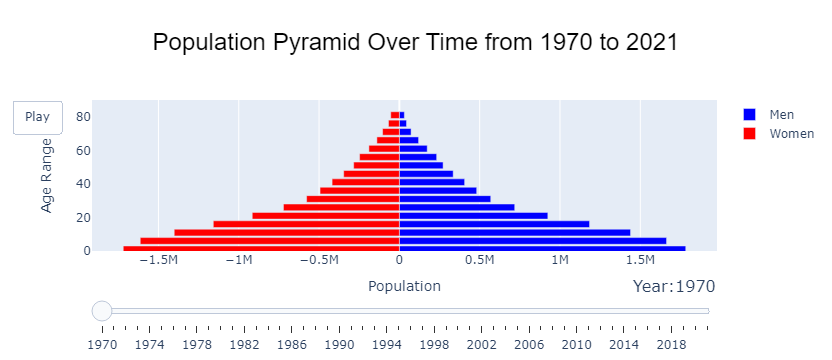

In [24]:
pop_df = population_dataframe('COL')
year_range = np.arange(1970, 2022)
plot_population_pyramid_animated(pop_df, year_range)

# Extras: Additional Population Visualizations

In [28]:
cf.go_offline()

In [29]:
find_country('asia')

id    name
----  ----------------------------------------------
BEA   East Asia & Pacific (IBRD-only countries)
BEC   Europe & Central Asia (IBRD-only countries)
CEA   East Asia and the Pacific (IFC classification)
CEU   Europe and Central Asia (IFC classification)
CSA   South Asia (IFC classification)
DEA   East Asia & Pacific (IDA-eligible countries)
DEC   Europe & Central Asia (IDA-eligible countries)
DSA   South Asia (IDA-eligible countries)
EAP   East Asia & Pacific (excluding high income)
EAS   East Asia & Pacific
ECA   Europe & Central Asia (excluding high income)
ECS   Europe & Central Asia
SAS   South Asia
TEA   East Asia & Pacific (IDA & IBRD countries)
TEC   Europe & Central Asia (IDA & IBRD countries)
TSA   South Asia (IDA & IBRD)


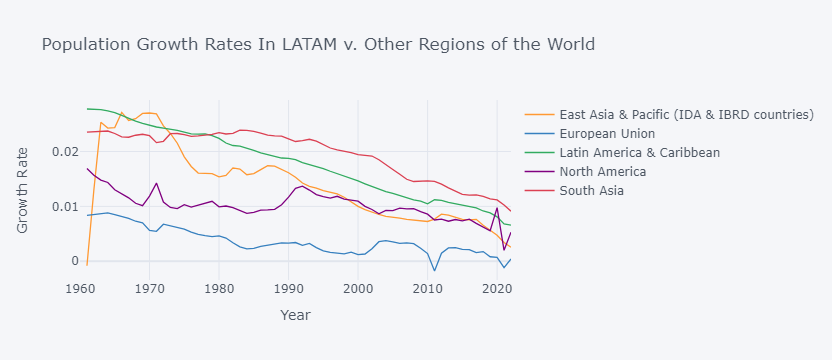

In [30]:
labels = {"SP.POP.TOTL":"Population"}

countries = {"NAC" : "North America",
             "LCN" : "Latin America & Caribbean",
             "EUU" : "European Union",
             "TEA" : "East Asia & Pacific (IDA & IBRD countries)",
             "SAS" : "South Asia"
            }

plot_df = wbdata.get_dataframe(labels, country = countries).squeeze()

plot_df = plot_df.unstack('country')

plot_df.index = plot_df.index.astype(int)

np.log(plot_df).diff().iplot(title="Population Growth Rates In LATAM v. Other Regions of the World",
                        yTitle="Growth Rate",xTitle='Year')

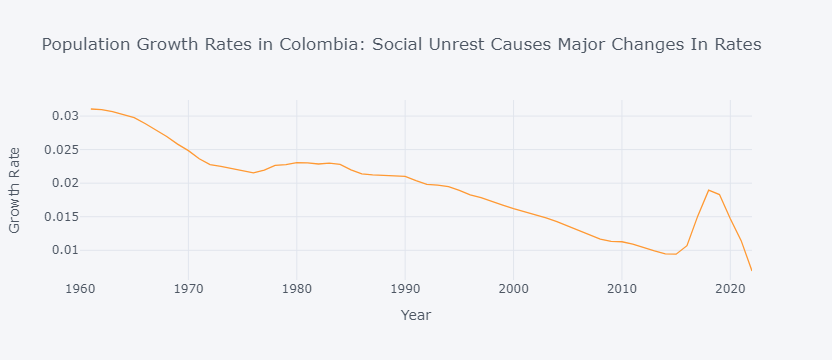

In [31]:
label = {"SP.POP.TOTL":"World Population"}

plot_df = wbdata.get_dataframe(label, country="COL")

plot_df.index = plot_df.index.astype(int)

plot_df = plot_df.sort_index() ### Need it to be ascending

### To get growth rate: np.log(plot_df).diff()
np.log(plot_df).diff().iplot(title="Population Growth Rates in Colombia: Social Unrest Causes Major Changes In Rates", 
                             xTitle='Year', yTitle='Growth Rate')
### Mid 60s: Conflict with Far-Right Guerillas Break Out
### Late 80s - Early 90s: Pablo Escobar Reign of Terror & Cartel Wars
### 2015 onwards collapse of Venezualan economy (more imigration to countries like Colombia)
### 2020: COVID

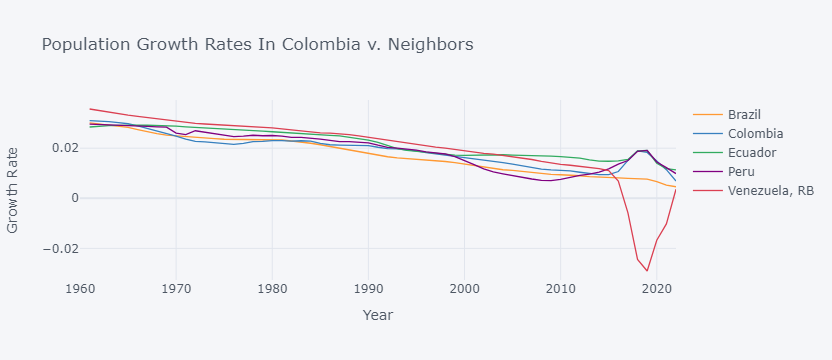

In [32]:
labels = {"SP.POP.TOTL":"Population"}

countries = {"COL":"Colombia",
             "BRA":"Brazil",
             "VEN":"Venezuela",
             "ECU":"Ecuador",
             "PER":"Peru"
            }

plot_df = wbdata.get_dataframe(labels, country = countries).squeeze()

plot_df = plot_df.unstack('country')

plot_df.index = plot_df.index.astype(int)

np.log(plot_df).diff().iplot(title="Population Growth Rates In Colombia v. Neighbors",
                        yTitle="Growth Rate",xTitle='Year')

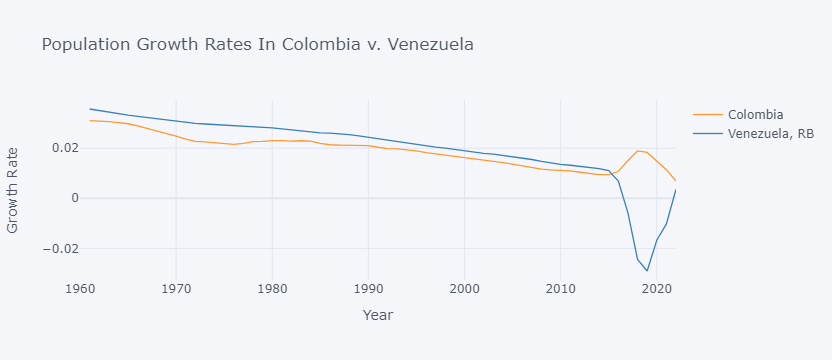

In [33]:
labels = {"SP.POP.TOTL":"Population"}

countries = {"COL":"Colombia",
             "VEN":"Venezuela"
            }

plot_df = wbdata.get_dataframe(labels, country = countries).squeeze()

plot_df = plot_df.unstack('country')

plot_df.index = plot_df.index.astype(int)

np.log(plot_df).diff().iplot(title="Population Growth Rates In Colombia v. Venezuela",
                        yTitle="Growth Rate",xTitle='Year')

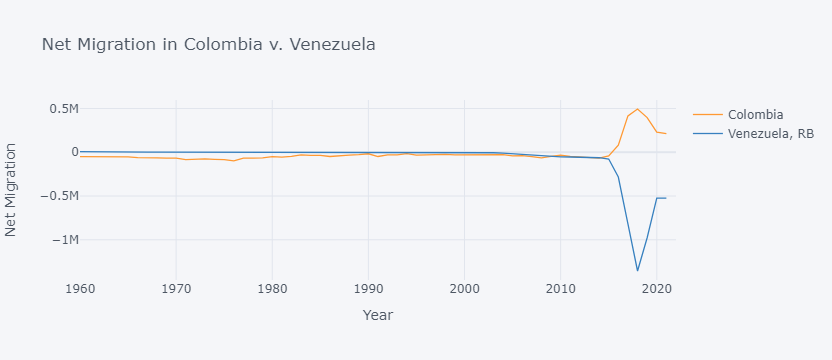

In [34]:
labels = {"SM.POP.NETM" : "Net migration"}

countries = {"COL":"Colombia", "VEN":"Venezuela"}

plot_df = wbdata.get_dataframe(labels, country = countries).squeeze()

plot_df = plot_df.unstack('country')

plot_df.index = plot_df.index.astype(int)

plot_df.iplot(title="Net Migration in Colombia v. Venezuela",
                        yTitle="Net Migration",xTitle='Year')

# Extras: Agricultural Supply

In [73]:
# wbdata.get_source()

In [37]:
SOURCE = 2 # World Development Indicators

indicators = wbdata.get_indicator(source=SOURCE)
indicators

id                         name
-------------------------  ---------------------------------------------------------------------------------------------------------------------------------------------
AG.AGR.TRAC.NO             Agricultural machinery, tractors
AG.CON.FERT.PT.ZS          Fertilizer consumption (% of fertilizer production)
AG.CON.FERT.ZS             Fertilizer consumption (kilograms per hectare of arable land)
AG.LND.AGRI.K2             Agricultural land (sq. km)
AG.LND.AGRI.ZS             Agricultural land (% of land area)
AG.LND.ARBL.HA             Arable land (hectares)
AG.LND.ARBL.HA.PC          Arable land (hectares per person)
AG.LND.ARBL.ZS             Arable land (% of land area)
AG.LND.CREL.HA             Land under cereal production (hectares)
AG.LND.CROP.ZS             Permanent cropland (% of land area)
AG.LND.EL5M.RU.K2          Rural land area where elevation is below 5 meters (sq. km)
AG.LND.EL5M.RU.ZS          Rural land area where elevation is below 5 me

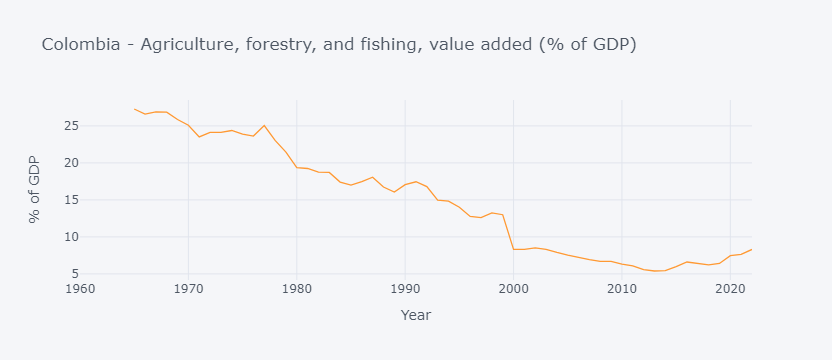

In [38]:
labels = {"NV.AGR.TOTL.ZS" : "Agriculture, forestry, and fishing, value added (% of GDP)"}

countries = {"COL":"Colombia"}

plot_df = wbdata.get_dataframe(labels, country = countries).squeeze()

plot_df.index = plot_df.index.astype(int)

plot_df.iplot(title="Colombia - Agriculture, forestry, and fishing, value added (% of GDP)",
                        yTitle="% of GDP",xTitle='Year')

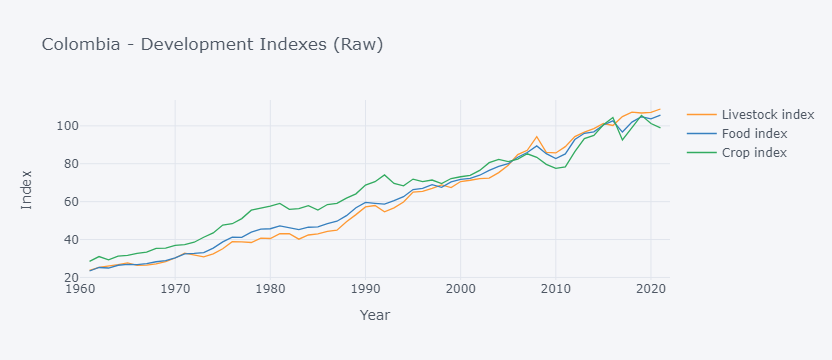

In [39]:
labels = {"AG.PRD.LVSK.XD":"Livestock index",
        "AG.PRD.FOOD.XD":"Food index",
        "AG.PRD.CROP.XD":"Crop index"}

countries = {"COL":"Colombia"}

plot_df = wbdata.get_dataframe(labels, country = countries).squeeze()

plot_df.index = plot_df.index.astype(int)

plot_df.iplot(title="Colombia - Development Indexes (Raw)",
                        yTitle="Index",xTitle='Year')

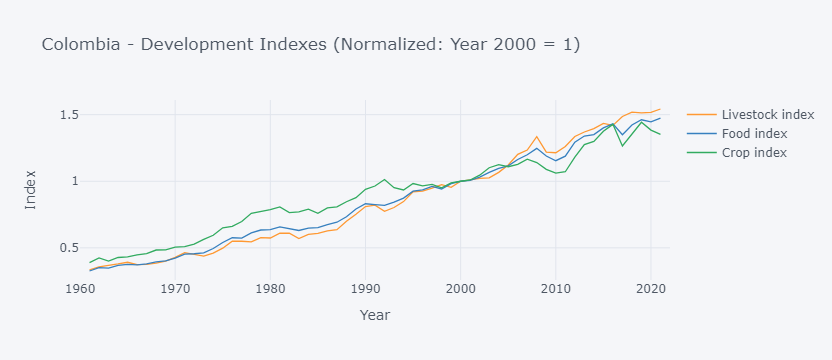

In [40]:
labels = {"AG.PRD.LVSK.XD":"Livestock index",
        "AG.PRD.FOOD.XD":"Food index",
        "AG.PRD.CROP.XD":"Crop index"}

countries = {"COL":"Colombia"}

plot_df = wbdata.get_dataframe(labels, country = countries).squeeze()

plot_df.index = plot_df.index.astype(int)

# Normalize so year normalization_year = 1
# Keep between 1961 & 2022
normalization_year = 2000
plot_df = plot_df/plot_df.loc[normalization_year,:]

plot_df.iplot(title=f"Colombia - Development Indexes (Normalized: Year {normalization_year} = 1)",
                        yTitle="Index",xTitle='Year')

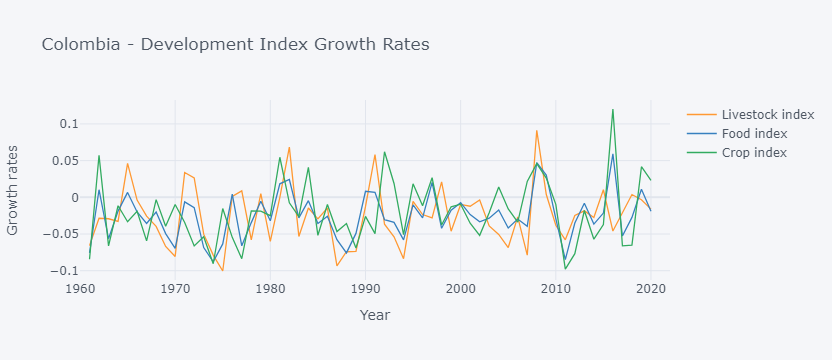

In [41]:
labels = {"AG.PRD.LVSK.XD":"Livestock index",
        "AG.PRD.FOOD.XD":"Food index",
        "AG.PRD.CROP.XD":"Crop index"}

countries = {"COL":"Colombia"}

plot_df = wbdata.get_dataframe(labels, country = countries).squeeze()

plot_df.index = plot_df.index.astype(int)

# Normalize so year normalization_year = 1
# Keep between 1961 & 2022
normalization_year = 2000
plot_df = plot_df/plot_df.loc[normalization_year,:]

np.log(plot_df).diff().iplot(title="Colombia - Development Index Growth Rates",
                             xTitle="Year",yTitle="Growth rates")

# Extras: Gini Index

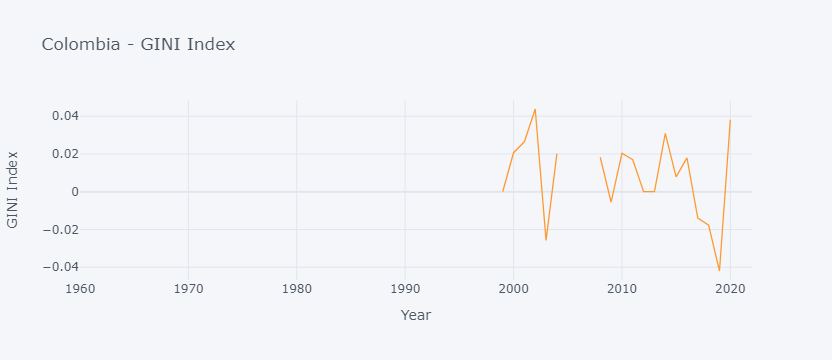

In [84]:
labels = {"SI.POV.GINI":"Gini index"}

countries = {"COL":"Colombia"}

plot_df = wbdata.get_dataframe(labels, country = countries).squeeze()

plot_df.index = plot_df.index.astype(int)

# Normalize so year normalization_year = 1
# Keep between 1961 & 2022
normalization_year = 2000
#plot_df = plot_df/plot_df.loc[normalization_year,:]

np.log(plot_df).diff().iplot(title="Colombia - GINI Index",
                             xTitle="Year",yTitle="GINI Index")